In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

# READ THE DATASETS

In [2]:
data=pd.read_csv("C:\\Users\\HP\\Downloads\\Uber Drives - .csv")
data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


# CHECK THE NULL VALUE IN THE PARTICULAR DATASET

In [3]:
data['CATEGORY*'].isnull().sum()

1

In [4]:
data['PURPOSE*'].isnull().sum()

503

In [5]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [6]:
data.isnull().any()   #any() key word is used to represnt that any column as true or false value.

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

# DROP THE NAN VALUE IN THE DATASETS

In [7]:
data=data.dropna()

In [8]:
data.isnull().sum()  # to check the missing value in the dataset after dropping the NaN.

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

# TO CHECK THE VARIOUS DATA TYPES IN THE DATASETS

In [9]:
data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

# TO CONVERT START_DATE AND END_DATE AS A DATETIME

In [10]:
data['START_DATE*']=pd.to_datetime(data['START_DATE*'],format='%m/%d/%Y %H:%M')
data['END_DATE*']=pd.to_datetime(data['END_DATE*'],format='%m/%d/%Y %H:%M')

C:\Users\HP\AppData\Local\Temp\ipykernel_15096\2867940693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['START_DATE*']=pd.to_datetime(data['START_DATE*'],format='%m/%d/%Y %H:%M')
C:\Users\HP\AppData\Local\Temp\ipykernel_15096\2867940693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['END_DATE*']=pd.to_datetime(data['END_DATE*'],format='%m/%d/%Y %H:%M')


In [11]:
data.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

# TO EXTRACT THE DAY,MONTH,WEEKDAY,HOURS FROM THE START_DAY COLUMN IN THE DATASET

In [12]:
hour = []
day= []
dayofweek=[]
month=[]
weekday=[]

for x in data['START_DATE*']:
    hour.append(x.hour),
    day.append(x.day),
    dayofweek.append(x.dayofweek),
    month.append(x.month),
    weekday.append(calendar.day_name[dayofweek[-1]])
    
    
data['HOUR']=hour
data['DAY']=day
data['DAY_OF_WEEK']=dayofweek
data['MONTH']=month
data['WEEKDAY']=weekday

C:\Users\HP\AppData\Local\Temp\ipykernel_15096\1935960718.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HOUR']=hour
C:\Users\HP\AppData\Local\Temp\ipykernel_15096\1935960718.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DAY']=day
C:\Users\HP\AppData\Local\Temp\ipykernel_15096\1935960718.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [13]:
data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1,31,5,12,Saturday
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13,31,5,12,Saturday
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,31,5,12,Saturday
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,31,5,12,Saturday


In [14]:
data['WEEKDAY'][data['WEEKDAY']=='Friday'].count()  #with the help of this we can find various things which can relate our 
# condition


data['HOUR'][data['HOUR']>15].count()

303

# TO CHECK THE VARIOUS CATEGORY WE HAVE

In [15]:
data['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

<Axes: xlabel='CATEGORY*', ylabel='count'>

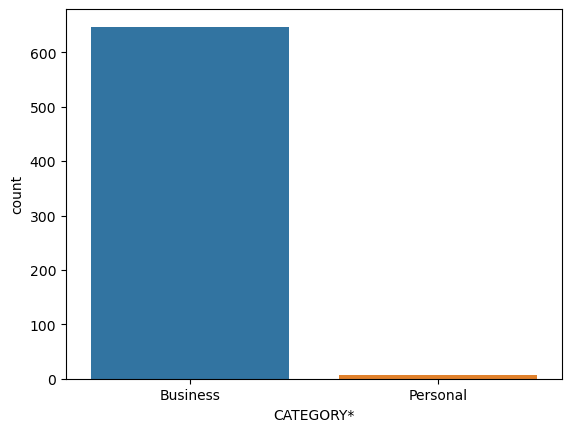

In [16]:
sns.countplot(x='CATEGORY*',data=data)

# HOW LONG DO PEOPLE TRAVEL WITH UBER

In [17]:
data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1,31,5,12,Saturday
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13,31,5,12,Saturday
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,31,5,12,Saturday
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,31,5,12,Saturday


<Axes: ylabel='Frequency'>

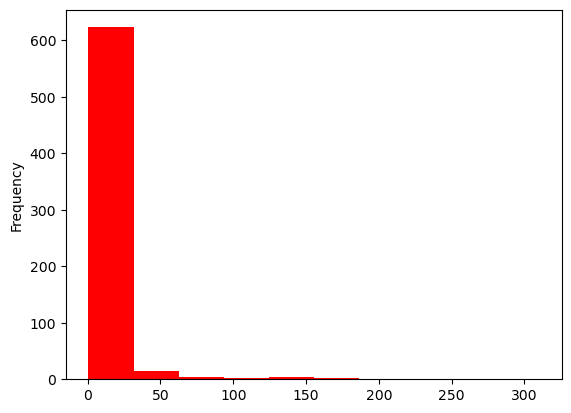

In [18]:
data['MILES*'].plot.hist(color='red')

# WHAT HOUR DO MOST PEOPLE TAKE UPER TO THE DESTINATION

In [19]:
hours = data['START_DATE*'].dt.hour.value_counts()
hours

13    55
14    52
17    51
15    51
18    51
16    45
20    45
12    43
11    39
19    35
21    34
10    33
9     26
23    21
22    21
8     17
0     13
7      8
1      4
3      3
5      3
6      2
2      1
Name: START_DATE*, dtype: int64

<Axes: >

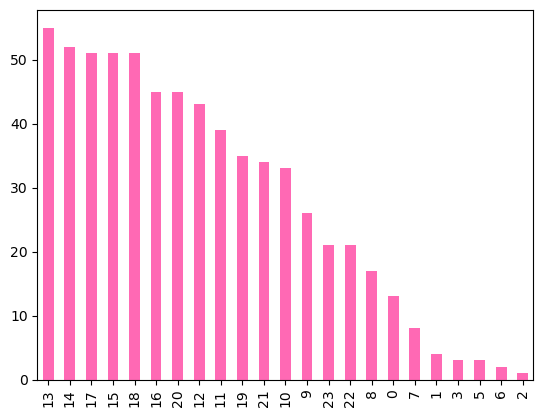

In [20]:
import matplotlib.pyplot as plt

hours.plot(kind='bar',color='hotpink')



# TO CHECK THE PURPOSE OF TRIP

In [21]:
purpose = data['PURPOSE*'].value_counts()

<Axes: >

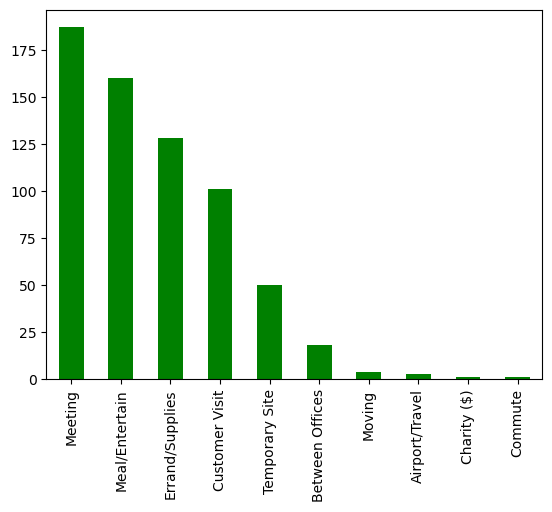

In [22]:
purpose.plot(kind='bar',color='green')

# WHICH DAY HAS THE HIGHEST NUMEBERS OF TRIPS

<Axes: >

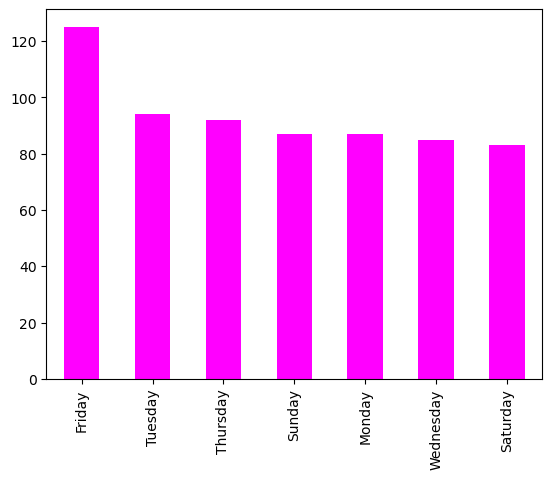

In [23]:
data['WEEKDAY'].value_counts().plot(kind='bar',color='magenta')

# WHAT ARE THE NUMBERS OF TRIP PER DAY

<Axes: >

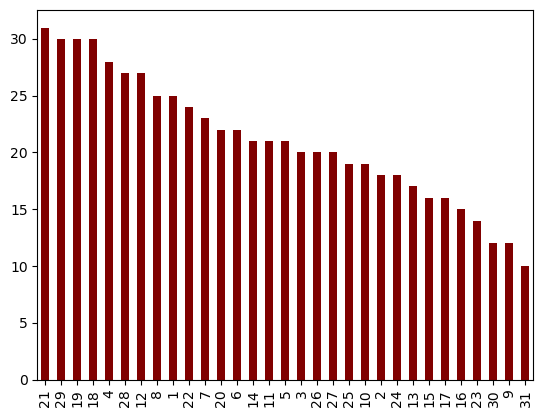

In [24]:
data['DAY'].value_counts().plot(kind='bar',color='maroon')

# WHAT ARE THE TRIPS IN THE MONTH

<Axes: >

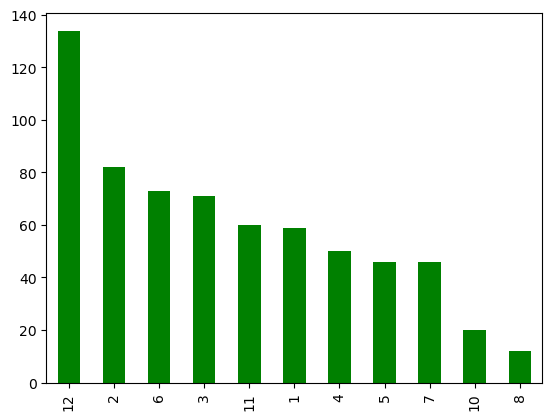

In [26]:
data['MONTH'].value_counts().plot(kind='bar',color='green')

# THE STARTING POINT OF TRIP,WHERE DO PEOPLE START BORDING THEIR TRIP FROM MOST?

<Axes: >

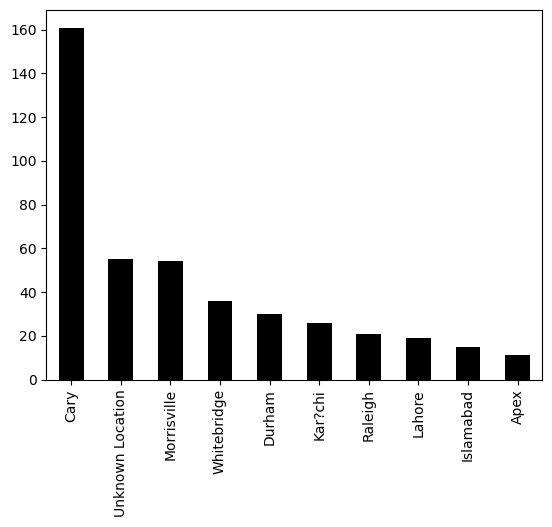

In [32]:
data['START*'].value_counts().head(10).plot(kind='bar',color='black')